# Midpoint Pandas

In [1]:
# Modules
import gzip                              # Modulo para no tener que descomprimir los datos previamente
import pandas
import datetime

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pandas.read_csv(gzip.open('../2016/20160307_AAPL.csv.gz', 'rt'))
data = data.loc[:,:'Price']              # No tener en cuentas las ultimas dos columnas 
data['Price'] = data['Price'] / 10000    # Precio en dolares  
data = data[data['T'] != 'X']            # Quitar todas las columnas que tengan 'T' en la accion hecha
data = data[data['T'] != 'T']            # Quitar todas las columnas que tengan 'X' en la accion hecha
data = data[data['T'] != 'E']            # Quitar todas las columnas que tengan 'E' en la accion hecha
data = data[data['T'] != 'C']            # Quitar todas las columnas que tengan 'C' en la accion hecha
data = data[:100000]                     # Prueba solo con pocos datos

data.head()

,Time,Ticker,Order,T,Shares,Price
0,14401574,AAPL,170282,S,2,105.55
1,14401574,AAPL,170283,S,2,106.53
2,14401574,AAPL,170284,S,2,107.52
3,14401574,AAPL,170285,S,2,104.58
4,14401574,AAPL,170286,B,2,98.87


In [3]:
print('Stock name: ', data.iloc[0,1])

time = [data.iloc[0]['Time']]                               # Primer dato de tiempo
sell = [data.loc[data['T'] == 'S'].iloc[0]['Price']]        # Primer dato precio de venta
buy = [data.loc[data['T'] == 'B'].iloc[0]['Price']]         # Primer dato precio de compra 
order_sell = [data.loc[data['T'] == 'S'].iloc[0]['Order']]  # Primer dato identificacion orden de venta
order_buy = [data.loc[data['T'] == 'B'].iloc[0]['Order']]   # Primer dato identificacion orden de compra
orders_id = [0]                                             # Primer dato identificacion de todos los movimientos
sell_help = data[data['T'] == 'S']['Price'].tolist()        # Lista con precios de todas las ventas (se eliminan los valores que desaparecen del libro de orden)
buy_help = data[data['T'] == 'B']['Price'].tolist()         # Lista con precios de todas las compras (se eliminan los valores que desaparecen del libro de orden)
order_sell_help = data[data['T'] == 'S']['Order'].tolist()  # Lista con las identificaciones de todas las ventas (se eliminan los valores que desaparecen del libro de orden)
order_buy_help = data[data['T'] == 'B']['Order'].tolist()   # Lista de identificaciones con todas las compras (se eliminan los valores que desaparecen del libro de orden)

time_1 = datetime.datetime.now()

for d in range(len(data)):

# ------------------------------------------------------------------------------------------------------------------------
# Para ventas
    
    if (data.iloc[d]['T'] == 'S'):                          # Si la orden es una venta 
        
        if (data.iloc[d]['Price'] < sell[-1] and            # Si el precio de venta es menor que el precio anterior  
            data.iloc[d]['Time'] != time[-1]):              # Si el tiempo es diferente al tiempo anterior
    
            time.append(data.iloc[d]['Time'])               # Agregar el tiempo a la lista time
            sell.append(data.iloc[d]['Price'])              # Agregar el precio de venta de la orden a la lista sell
            buy.append(buy[-1])                             # Agregar el precio anterior de compra a la lista buy
            order_sell.append(data.iloc[d]['Order'])        # Agregar la identificacion de la orden de venta a la lista order_sell
            orders_id.append(data.iloc[d]['Order'])         # Agregar la identificacion de la orden de venta a la lista orders_id
    
        elif (data.iloc[d]['Price'] < sell[-1] and          # Si el precio es menor que el precio anterior  
              data.iloc[d]['Time'] == time[-1]):            # Si el tiempo es igual al tiempo anterior
        
            sell[-1] = data.iloc[d]['Price']                # Igualar el ultimo dato de la lista sell al valor del precio de venta de la orden
            order_sell[-1] = data.iloc[d]['Order']          # Igualar el ultimo dato de la lista order_sell a la identificacion de la orden
            orders_id[-1] = data.iloc[d]['Order']           # Igualar el ultimo dato de la lista orders_id a la identificacion de la orden

# ------------------------------------------------------------------------------------------------------------------------
# Para compras        
    
    elif (data.iloc[d]['T'] == 'B'):                        # Si la orden es una compra
        
        if (data.iloc[d]['Price'] > buy[-1] and             # Si el precio de compra es mayor que el precio anterior
            data.iloc[d]['Time'] != time[-1]):              # Si el tiempo es diferente al tiempo anterior
          
            time.append(data.iloc[d]['Time'])               # Agregar el tiempo a la lista time
            buy.append(data.iloc[d]['Price'])               # Agregar el precio de compra de la orden a la lista buy
            sell.append(sell[-1])                           # Agregar el precio anterior de venta a la lista sell
            order_buy.append(data.iloc[d]['Order'])         # Agregar la identificacion de la orden de venta a la lista order_buy
            orders_id.append(data.iloc[d]['Order'])         # Agregar la identificacion de la orden de venta a la lista orders_id
        
        elif (data.iloc[d]['Price'] > buy[-1] and           # Si el precio de compra es mayor que el precio anterior 
              data.iloc[d]['Time'] == time[-1]):            # Si el tiempo es igual al tiempo anterior

            buy[-1] = data.iloc[d]['Price']                 # Igualar el ultimo dato de la lista buy al valor del precio de compra de la orden            
            order_buy[-1] = data.iloc[d]['Order']           # Igualar el ultimo dato de la lista order_buy a la identificacion de la orden
            orders_id[-1] = data.iloc[d]['Order']           # Igualar el ultimo dato de la lista orders_id a la identificacion de la orden
    
# ------------------------------------------------------------------------------------------------------------------------
# Para ordenes de compra completamente eliminadas o ejecutadas
    
    elif (data.iloc[d]['T'] == 'F' or data.iloc[d]['T'] == 'D'):                      # Si la accion es ejecutar la orden completamente
        
        if (data.iloc[d]['Order'] in order_buy_help):
            
            if (data.iloc[d]['Order'] in order_buy_help[:order_buy_help.index(data.iloc[d]['Order'])]):

                if (data.iloc[d]['Order'] == order_buy[-1]):         # Si la identificacion de la orden esta en la lista de identificaciones de venta

                    time.append(data.iloc[d]['Time'])                   # Agregar el tiempo a la lista time
                    sell.append(sell[-1])
                    max_buy_help = max(buy_help[:order_buy_help.index(data.iloc[d]['Order'])])
                    buy.append(max_buy_help)
                    order_buy.append(order_buy_help[buy_help.index(max_buy_help)])
                    orders_id.append(order_buy_help[buy_help.index(max_buy_help)])

                buy_help.remove(buy_help[order_buy_help.index(data.iloc[d]['Order'])])
                order_buy_help.remove(data.iloc[d]['Order'])
                      
# ------------------------------------------------------------------------------------------------------------------------
# Para ordenes de venta completamente eliminadas o ejecutadas
        
        elif (data.iloc[d]['Order'] in order_sell_help):  
        
            if (data.iloc[d]['Order'] in order_sell_help[:order_sell_help.index(data.iloc[d]['Order'])]):

                if (data.iloc[d]['Order'] == order_sell[-1]):         # Si la identificacion de la orden esta en la lista de identificaciones de venta

                    time.append(data.iloc[d]['Time'])                   # Agregar el tiempo a la lista time
                    buy.append(buy[-1])
                    min_sell_help = min(sell_help[:order_sell_help.index(data.iloc[d]['Order'])])
                    sell.append(min_sell_help)
                    order_sell.append(order_sell_help[sell_help.index(min_sell_help)])
                    orders_id.append(order_sell_help[sell_help.index(min_sell_help)])

                sell_help.remove(sell_help[order_sell_help.index(data.iloc[d]['Order'])])
                order_sell_help.remove(data.iloc[d]['Order'])
# ------------------------------------------------------------------------------------------------------------------------
# Para los tiempos en los que no se cumplan ninguna de las condiciones anteriores
            
    else:
        
        time.append(time[-1])               # Agregar el tiempo a la lista time
        sell.append(sell[-1])              # Agregar el precio de venta de la orden a la lista sell
        buy.append(buy[-1])                             # Agregar el precio anterior de compra a la lista buy
        order_sell.append(order_sell[-1])        # Agregar la identificacion de la orden de venta a la lista order_sell
        order_buy.append(order_buy[-1])         # Agregar la identificacion de la orden de venta a la lista order_buy
        orders_id.append(orders_id[-1]) 
        
# ------------------------------------------------------------------------------------------------------------------------
# Para
            
        assert (len(time) == len(buy) and 
                len(time) == len(sell) and 
                len(time) == len(orders_id) and 
                len(order_sell_help) == len(sell_help) and 
                len(order_buy_help) == len(buy_help))
    
time_2 = datetime.datetime.now()

print('Time: ', time_2 - time_1)

Stock name:  AAPL
Time:  0:04:47.595026


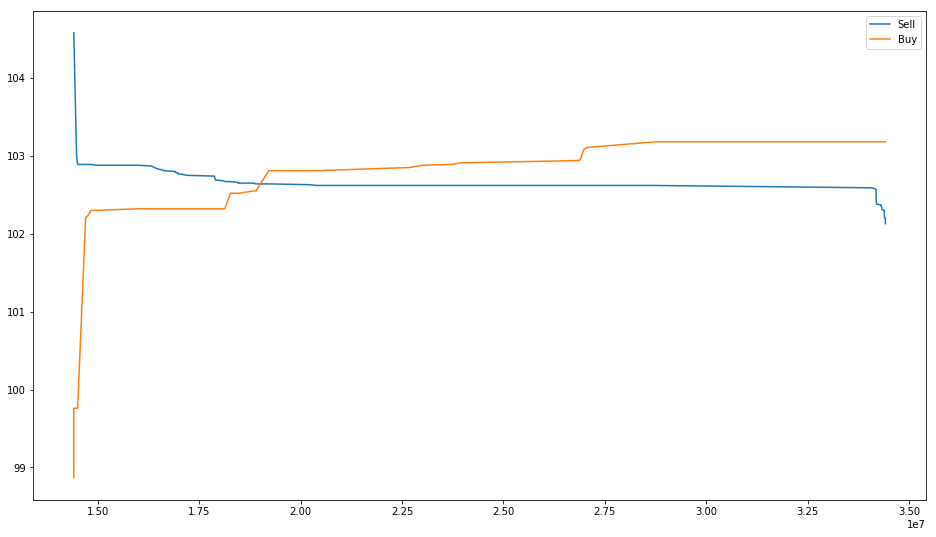

In [5]:
figure = plt.figure(figsize=(16,9))

plt.plot(time, sell, label='Sell')
plt.plot(time, buy, label='Buy')

plt.legend()

In [9]:
import numpy

a = numpy.array([1, 2, 3])
b = numpy.array([3, 2, 1])

(a < 2) * (b > 2) > 0

array([ True, False, False])